In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content")

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/APP-CQ18/plant-pathology-2020-fgvc7.zip

Archive:  /content/drive/MyDrive/APP-CQ18/plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: im

In [3]:
import glob 
import cv2 
from google.colab.patches import cv2_imshow

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
test_dir = glob.glob('/content/images/Test*.jpg')  
train_dir = glob.glob('/content/images/Train*.jpg')  

train_dir = sorted(train_dir, key = lambda x: (len(x), x))
test_dir = sorted(test_dir, key = lambda x: (len(x), x))

test = [] 
train = [] 
scale = 0.5

for f in test_dir: 
  img = cv2.imread(f)
  width = int(img.shape[1] * scale)
  height = int(img.shape[0] * scale)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  test.append(resized) 

for f in train_dir: 
  img = cv2.imread(f)
  width = int(img.shape[1] * scale)
  height = int(img.shape[0] * scale)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  train.append(resized) 

In [5]:
import numpy as np

def resize(image, scale_height, scale_width): # resize image function with scale is in range (0, 1)
  height, width, channel = image.shape[:] # get height, width, channel in shape of image

  new_height = int(height * scale_height) # new height after height scaled
  new_width = int(width * scale_width) # new width after width scaled

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(new_width):
    array_width.append(array_channel)
  for k in range(new_height):
    array_height.append(array_width)

  new_image = np.array(array_height)
  
  for i in range(new_height): # iterate vertical pixel in new height
   for j in range(new_width): # iterate horizontal pixel in new width
    new_image[i, j] = image[int(i / scale_height), int(j / scale_width)] # root image has bigger size than new image, pixels in root image
    # have smaller size than new image. Because scale is in range (0, 1) so that pixels divide to scale

  return new_image # return new image

In [6]:
def gray(image, ksize): # gray image function
  height, width, channel = image.shape[:] # get height, width, channel in shape of image 

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(width):
    array_width.append(array_channel)
  for k in range(height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  for i in range(height): # iterate vertical pixel in height
   for j in range(width): # iterate horizontal pixel in width
 
    temp = (float(image[i][j][0]) * float(image[i][j][1]) * float(image[i][j][2])) ** (1/3) # calculate temp value

    new_image[i][j][0] = temp / ksize  # set red pixels to temp value
    new_image[i][j][1] = temp / ksize  # set green pixels to temp value
    new_image[i][j][2] = temp / ksize  # set blue pixels to temp value
    # convert root image to gray image because red, green, blue pixels are equal
    
  return new_image # return new image

In [32]:
def equal(arr1, arr2): #check equal two arrays function

  for i in range(len(arr1)): # iterate length of array
    if arr1[i] != arr2[i]: # compare all elements of two arrays
      return False

  return True # if all elements are same

In [35]:
def blur(image, ksize): # blur image function
  height, width, channel = image.shape[:] # get height, width, channel in shape of image 

  array_channel = []
  array_height = []
  array_width = []

  for i in range(channel):
    array_channel.append(np.float64(0))
  for j in range(width):
    array_width.append(array_channel)
  for k in range(height):
    array_height.append(array_width)

  new_image = np.array(array_height)

  for i in range(height - ksize): # iterate vertical pixel in height
   for j in range(width - ksize): # iterate horizontal pixel in width
    for k in range(channel): # iterate channel
      for l in range(ksize): # iterate ksize

        temp = (float(image[i + l, j + l][k]) * float(image[i - l, j - l][k]) * float(image[i, j + l][k]) * float(image[i, j - l][k]) * \
                      float(image[i + l, j][k]) * float(image[i - l, j][k]) * float(image[i + l, j - l][k]) * float(image[i - l, j + l][k])) ** (1/8)
        # calculate temp value
        new_image[i, j][k] += temp / ksize # calculate pixels in range of ksize 

  for i in range(height):
    for j in range(width):

      if equal(new_image[i, j], [0,0,0]): # check black pixels in new image
        new_image[i, j] = image[i, j] # if this is true, change black pixels to pixels in root image

  return new_image # return new image

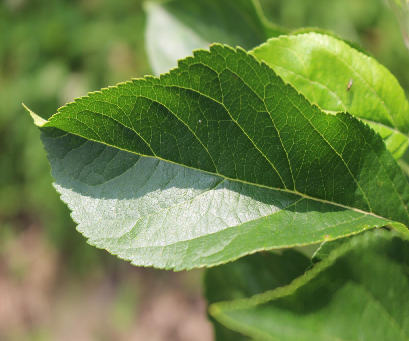

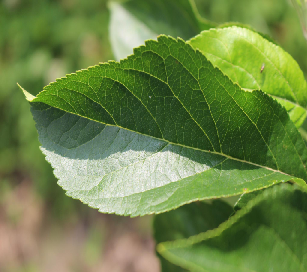

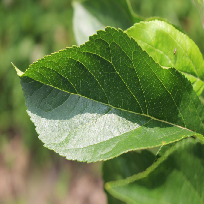

In [8]:
cv2_imshow(resize(train[99], 0.5, 0.4))
cv2_imshow(resize(train[99], 0.4, 0.3))
cv2_imshow(resize(train[99], 0.3, 0.2))

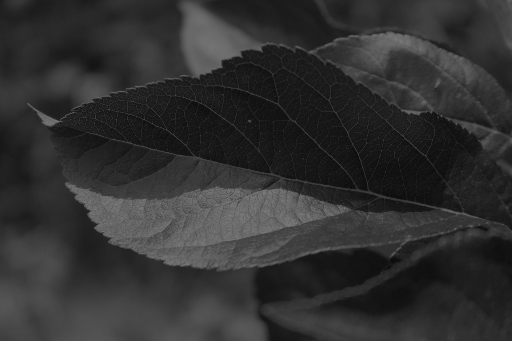

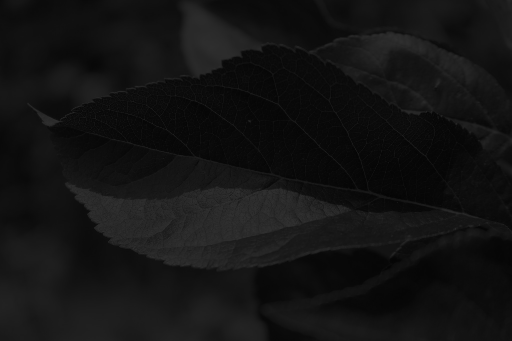

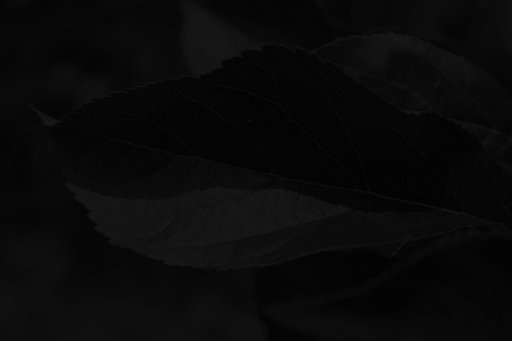

In [9]:
cv2_imshow(resize(gray(train[99], 2), 0.5, 0.5))
cv2_imshow(resize(gray(train[99], 5), 0.5, 0.5))
cv2_imshow(resize(gray(train[99], 10), 0.5, 0.5))

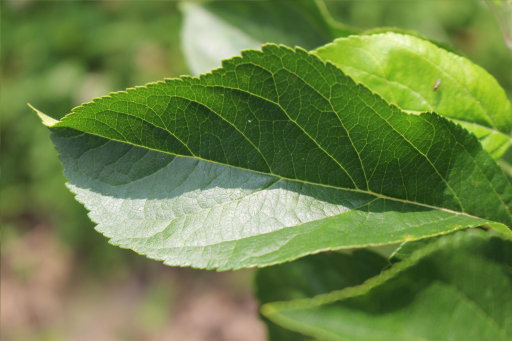

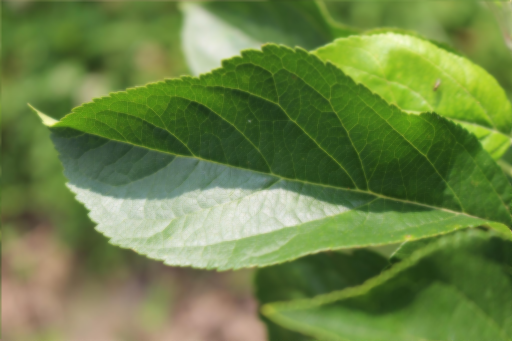

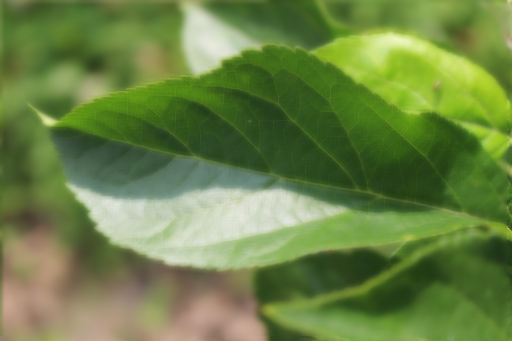

In [36]:
cv2_imshow(resize(blur(train[99], 2), 0.5, 0.5))
cv2_imshow(resize(blur(train[99], 5), 0.5, 0.5))
cv2_imshow(resize(blur(train[99], 10), 0.5, 0.5))

In [11]:
import numba
from numba.cuda import *

In [12]:
@jit
def cuda_resize(image:np.array, scale_height:np.float64, scale_width:np.float64, new_image:np.array):
  row, col = grid(2)

  if row < image.shape[0] and col < image.shape[1]:
    new_image[row, col] = image[int(row / scale_height), int(col / scale_width)]

  return new_image

In [13]:
import math

threadsperblock = (8, 8)
blockspergrid_x = math.ceil(train[99].shape[0] / threadsperblock[0])
blockspergrid_y = math.ceil(train[99].shape[1] / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)

resize_image = np.zeros([int(train[99].shape[0] * 0.5), int(train[99].shape[1] * 0.4), train[99].shape[2]])

In [14]:
# cuda_resize[blockspergrid, threadsperblock](train[99], 0.5, 0.4, resize_image)

In [15]:
@jit
def cuda_gray(image, ksize):
  pass

In [16]:
@jit
def cuda_blur(image, ksize):
  pass